### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


In [3]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [1]:
!python -m pip install --upgrade scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

    100% |████████████████████████████████| 20.0MB 1.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
The scikit-learn version is 0.24.2.


In [2]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
print("OneHotEncoder imported successfully!")

OneHotEncoder imported successfully!


In [3]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

    100% |████████████████████████████████| 1.6MB 12.1MB/s ta 0:00:01


In [4]:
# Retest version
import sklearn
print(sklearn.__version__)  # Should show 0.24.2

0.24.2


In [5]:
# %pip install kneed
!pip install kneed --user

In [ ]:
Restart the Kernel. 

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [28]:
# STILL HAVING PROBLEM UPGRAING TO 0.24.2, GOING TO USE pandas.get_dummies() for One-Hot Encoding
import pandas as pd

# Load in the general demographics data (semicolon-separated)
gen_pop_data = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=";", low_memory=False)

# Load in the feature summary file (semicolon-separated)
feature_sum_data = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=";", low_memory=False)

# Display first few rows to check successful loading
print(gen_pop_data.head())
print(feature_sum_data.head())

   AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN         NaN   
1                     

In [29]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

# Check general demographics data

# Print the number of rows and columns
print(f"General Demographics Data Shape: {gen_pop_data.shape}")

# Display the first few rows
print("\nFirst 5 rows of General Demographics Data:")
print(gen_pop_data.head())

# Check the column names and data types
print("\nGeneral Demographics Columns and Data Types:")
print(gen_pop_data.dtypes)

# Check for missing values in the feature summary dataset
print("\nMissing Values in General Demographics:")
print(gen_pop_data.isnull().sum())

General Demographics Data Shape: (891221, 85)

First 5 rows of General Demographics Data:
   AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0           

> **Observations**: 

Shape: (891221, 85)
Missing Data: Some columns have a lot of missing values.
Data Types: Mostly int64 and float64.
Some categorical columns (OST_WEST_KZ, CAMEO_DEUG_2015, CAMEO_DEU_2015 and CAMEO_INTL_2015) are stored as objects.

In [30]:
# Check the structure of feature data set

# Print the number of rows and columns
print(f"Feature Summary Data Shape: {feature_sum_data.shape}")

# Display the first few rows
print("\nFirst 5 rows of Feature Summary Data:")
print(feature_sum_data.head())

# Check the column names and data types
print("\nFeature Summary Columns and Data Types:")
print(feature_sum_data.dtypes)

# Check for missing values in the feature summary dataset
print("\nMissing Values in Feature Summary:")
print(feature_sum_data.isnull().sum())

Feature Summary Data Shape: (85, 4)

First 5 rows of Feature Summary Data:
              attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

Feature Summary Columns and Data Types:
attribute             object
information_level     object
type                  object
missing_or_unknown    object
dtype: object

Missing Values in Feature Summary:
attribute             0
information_level     0
type                  0
missing_or_unknown    0
dtype: int64


> **Observations**:
    
Shape: (85, 4) 
No Missing Values: 0

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing - Extract Missing Value Codes from Feature Summary

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

In [31]:
import numpy as np

# Create a dictionary to store missing value codes for each attribute
missing_values_dict = {}

for index, row in feature_sum_data.iterrows():
    if pd.notna(row["missing_or_unknown"]):  # Ensure it's not NaN
        # Convert the string representation of list to an actual list
        missing_values = row["missing_or_unknown"].strip("[]").split(",")
        # Convert to integer values (or strip spaces)
        missing_values = [int(value) if value.strip().isdigit() else value.strip() for value in missing_values]
        missing_values_dict[row["attribute"]] = missing_values

# Print a sample of the missing values dictionary
print("Sample of missing values dictionary:")
for key, value in list(missing_values_dict.items())[:5]:  # Show first 5 for readability
    print(f"{key}: {value}")

Sample of missing values dictionary:
AGER_TYP: ['-1', 0]
ALTERSKATEGORIE_GROB: ['-1', 0, 9]
ANREDE_KZ: ['-1', 0]
CJT_GESAMTTYP: [0]
FINANZ_MINIMALIST: ['-1']


#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [32]:
# Identify missing or unknown data values and convert them to NaNs.

# Replace missing values in the demographics dataset
for col, missing_vals in missing_values_dict.items():
    if col in gen_pop_data.columns:  # Ensure the column exists in the dataset
        gen_pop_data[col] = gen_pop_data[col].replace(missing_vals, np.nan)

# Check missing values after conversion
missing_counts = gen_pop_data.isnull().sum()
print("\nMissing Values After Conversion:\n", missing_counts[missing_counts > 0].sort_values(ascending=False))


Missing Values After Conversion:
 TITEL_KZ                 889061
KK_KUNDENTYP             584612
KBA05_BAUMAX             476524
GEBURTSJAHR              392318
ALTER_HH                 310267
KKK                      158064
REGIOTYP                 158064
W_KEIT_KIND_HH           147988
MOBI_REGIO               133324
KBA05_ANTG1              133324
KBA05_ANTG2              133324
KBA05_ANTG3              133324
KBA05_ANTG4              133324
KBA05_GBZ                133324
PLZ8_GBZ                 116515
PLZ8_ANTG1               116515
PLZ8_ANTG2               116515
PLZ8_ANTG3               116515
PLZ8_ANTG4               116515
PLZ8_BAUMAX              116515
PLZ8_HHZ                 116515
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
KBA13_ANZAHL_PKW         105800
ANZ_HAUSHALTE_AKTIV       99611
CAMEO_DEUG_2015           99352
CAMEO_DEU_2015            99352
CAMEO_INTL_2015           99352
LP_LEBENSPHASE_FEIN       97632
ARBEIT                    97375
RELAT

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

<span style="color:blue">Compute Missing Data Percentage</span>

In [33]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

import matplotlib.pyplot as plt

# Calculate missing value percentage per column
missing_percent = (gen_pop_data.isnull().sum() / len(gen_pop_data)) * 100

# Display missing percentage for the top 10 columns with the most missing data
print("Top 10 Columns with Highest Missing Data:\n")
print(missing_percent.sort_values(ascending=False).head(10))


Top 10 Columns with Highest Missing Data:

TITEL_KZ          99.757636
KK_KUNDENTYP      65.596749
KBA05_BAUMAX      53.468668
GEBURTSJAHR       44.020282
ALTER_HH          34.813699
REGIOTYP          17.735668
KKK               17.735668
W_KEIT_KIND_HH    16.605084
KBA05_GBZ         14.959701
KBA05_ANTG3       14.959701
dtype: float64


<span style="color:blue">Visualize the Distribution of Missing Values</span>


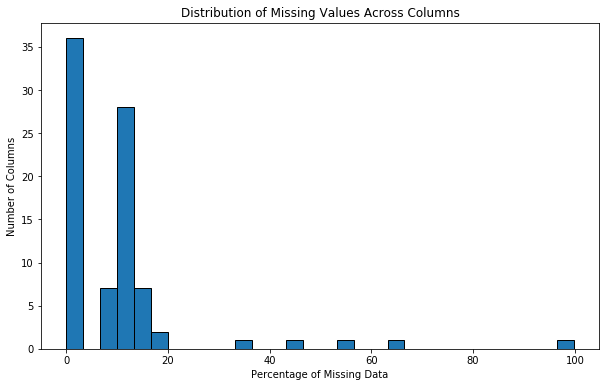

In [34]:
# Investigate patterns in the amount of missing data in each column.

# Plot histogram of missing values
plt.figure(figsize=(10, 6))
plt.hist(missing_percent, bins=30, edgecolor="black")
plt.xlabel("Percentage of Missing Data")
plt.ylabel("Number of Columns")
plt.title("Distribution of Missing Values Across Columns")
plt.show()


<span style="color:blue">Identify and Remove Outlier Columns</span>


In [35]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# If a column has more than 40% missing data, we will remove it.

# Set missing value threshold (e.g., remove columns with >40% missing data)
threshold = 40  

# Identify columns to drop
cols_to_drop = missing_percent[missing_percent > threshold].index

# Drop these columns from the dataset
gen_pop_data_cleaned = gen_pop_data.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns due to excessive missing data.")

Dropped 4 columns due to excessive missing data.


#### Discussion 1.1.2: Assess Missing Data in Each Column

**Observations regarding the amount of missing data in each column. 

- Are there any patterns in missing values? 
The histogram showed that most columns had low missing values, but a few had a very high percentage of missing data.

- Which columns were removed from the dataset?
Categorical columns (CAMEO_DEUG_2015, OST_WEST_KZ, etc.) had significant missing values.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

<span style="color:blue">Compute Missing Data Per Row </span>


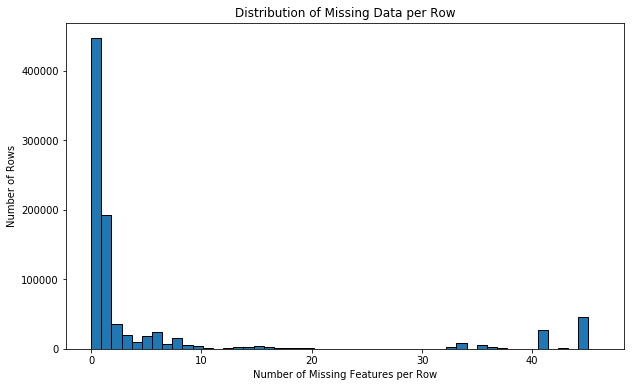

Missing Data per Row Statistics:
 count    891221.000000
mean          5.633084
std          12.673271
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          46.000000
dtype: float64


In [36]:
# How much data is missing in each row of the dataset?

# Count missing values per row
missing_per_row = gen_pop_data_cleaned.isnull().sum(axis=1)

# Plot histogram of missing values per row
plt.figure(figsize=(10, 6))
plt.hist(missing_per_row, bins=50, edgecolor="black")
plt.xlabel("Number of Missing Features per Row")
plt.ylabel("Number of Rows")
plt.title("Distribution of Missing Data per Row")
plt.show()

# Display summary statistics of missing values per row
print("Missing Data per Row Statistics:\n", missing_per_row.describe())

<span style="color:blue">Define & Split Data</span>


In [37]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# Define threshold (ex: remove rows with >30% missing values)
threshold = 0.3 * gen_pop_data_cleaned.shape[1]  # 30% of total columns

# Identify rows to keep and remove
rows_to_remove = missing_per_row[missing_per_row > threshold].index
rows_to_keep = missing_per_row[missing_per_row <= threshold].index

# Split the dataset
gen_pop_data_high_missing = gen_pop_data_cleaned.loc[rows_to_remove]  # Rows with many missing values
gen_pop_data_low_missing = gen_pop_data_cleaned.loc[rows_to_keep]  # Rows to keep

print(f"Rows with many missing values: {len(gen_pop_data_high_missing)}")
print(f"Rows kept for further analysis: {len(gen_pop_data_low_missing)}")


Rows with many missing values: 93300
Rows kept for further analysis: 797921


<span style="color:blue">Compare Data Distributions</span>


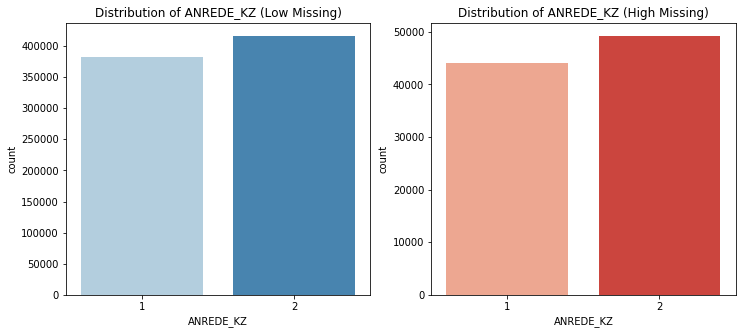

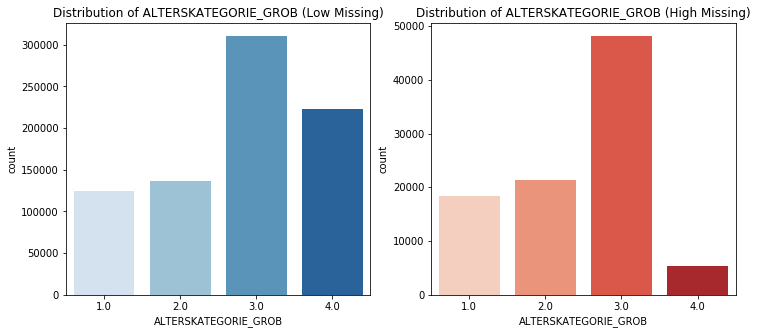

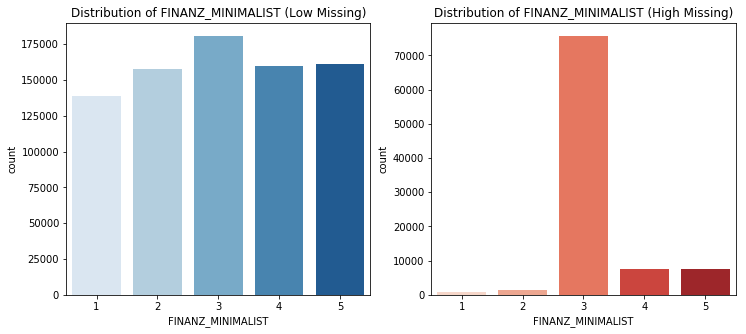

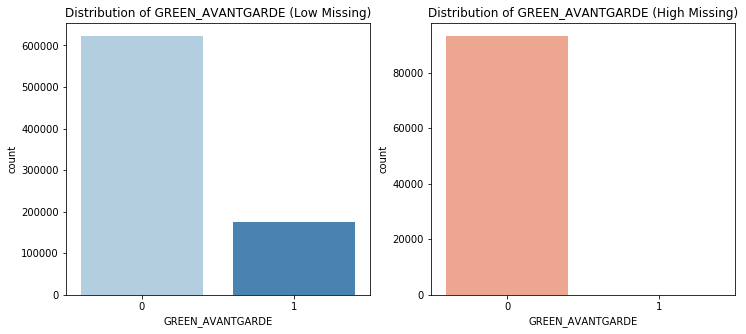

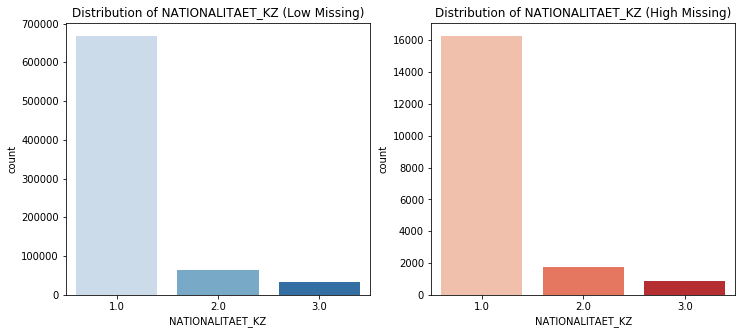

In [38]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

import seaborn as sns

def compare_distributions(feature):
    """Compare distributions of a feature between high-missing and low-missing datasets."""
    plt.figure(figsize=(12, 5))

    # First subplot: Low missing group
    plt.subplot(1, 2, 1)
    sns.countplot(x=gen_pop_data_low_missing[feature], palette="Blues")
    plt.title(f"Distribution of {feature} (Low Missing)")

    # Second subplot: High missing group
    plt.subplot(1, 2, 2)
    sns.countplot(x=gen_pop_data_high_missing[feature], palette="Reds")
    plt.title(f"Distribution of {feature} (High Missing)")

    plt.show()

# Select 5 features to compare
features_to_compare = ["ANREDE_KZ", "ALTERSKATEGORIE_GROB", "FINANZ_MINIMALIST", "GREEN_AVANTGARDE", "NATIONALITAET_KZ"]

# Compare distributions
for feature in features_to_compare:
    compare_distributions(feature)

#### Discussion 1.1.3: Assess Missing Data in Each Row

- Are the data with lots of missing values are qualitatively different from data with few or no missing values?
Analyzed five features (ANREDE_KZ, ALTERSKATEGORIE_GROB, FINANZ_MINIMALIST, GREEN_AVANTGARDE, NATIONALITAET_KZ) and compared their distributions in:

1. Rows with few missing values (kept for analysis)
2. Rows with many missing values (potentially dropped)

If distributions were similar, it suggests that missing values are randomly distributed and do not indicate a separate population.

If distributions were different, it suggests that missing values may be related to certain demographic characteristics.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

<span style="color:blue">Count Features by Type</span>



In [39]:
# How many features are there of each data type?

# Count the number of features for each type
feature_counts = feature_sum_data["type"].value_counts()

# Display feature type distribution
print("Feature Type Distribution:\n", feature_counts)

Feature Type Distribution:
 ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64


<span style="color:blue">Identify Features by Type </span>

In [40]:
# Extract feature names by type
ordinal_features = feature_sum_data[feature_sum_data["type"] == "ordinal"]["attribute"].tolist()
categorical_features = feature_sum_data[feature_sum_data["type"] == "categorical"]["attribute"].tolist()
numeric_features = feature_sum_data[feature_sum_data["type"] == "numeric"]["attribute"].tolist()
mixed_features = feature_sum_data[feature_sum_data["type"] == "mixed"]["attribute"].tolist()

# Print feature counts
print(f"Ordinal Features: {len(ordinal_features)}")
print(f"Categorical Features: {len(categorical_features)}")
print(f"Numeric Features: {len(numeric_features)}")
print(f"Mixed Features: {len(mixed_features)}")

Ordinal Features: 49
Categorical Features: 21
Numeric Features: 7
Mixed Features: 7


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

<span style="color:blue">Identify Categorical Features & Unique Values</span>


In [41]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# # Check unique values for each categorical feature
# for col in categorical_features:
#     unique_values = gen_pop_data_cleaned[col].nunique()
#     print(f"{col}: {unique_values} unique values")

# Check for Missing Features

# # Identify features in the list that are missing in the DataFrame
# missing_features = [col for col in categorical_features if col not in gen_pop_data_cleaned.columns]

# print("Missing Features:", missing_features)


# Check unique values for categorical features that exist in the cleaned DataFrame
for col in [feature for feature in categorical_features if feature in gen_pop_data_cleaned.columns]:
    unique_values = gen_pop_data_cleaned[col].nunique()
    print(f"{col}: {unique_values} unique values")

AGER_TYP: 4 unique values
ANREDE_KZ: 2 unique values
CJT_GESAMTTYP: 6 unique values
FINANZTYP: 6 unique values
GFK_URLAUBERTYP: 12 unique values
GREEN_AVANTGARDE: 2 unique values
LP_FAMILIE_FEIN: 11 unique values
LP_FAMILIE_GROB: 5 unique values
LP_STATUS_FEIN: 10 unique values
LP_STATUS_GROB: 5 unique values
NATIONALITAET_KZ: 3 unique values
SHOPPER_TYP: 5 unique values
SOHO_KZ: 2 unique values
VERS_TYP: 3 unique values
ZABEOTYP: 6 unique values
GEBAEUDETYP: 7 unique values
OST_WEST_KZ: 2 unique values
CAMEO_DEUG_2015: 9 unique values
CAMEO_DEU_2015: 44 unique values


<span style="color:blue">Convert Binary Non-Numeric Categorical Feature</span>


In [42]:
# Re-encode categorical variable(s) to be kept in the analysis.

# Check unique values
print("OST_WEST_KZ unique values:", gen_pop_data_cleaned["OST_WEST_KZ"].unique())

# Map values to numeric (assuming values are 'W' and 'O' → 0 and 1)
gen_pop_data_cleaned["OST_WEST_KZ"] = gen_pop_data_cleaned["OST_WEST_KZ"].map({"W": 0, "O": 1})

print("Re-encoded OST_WEST_KZ as numeric.")


OST_WEST_KZ unique values: [nan 'W' 'O']
Re-encoded OST_WEST_KZ as numeric.


<span style="color:blue">One-Hot Encode Multi-Level Categorical Features </span>


In [43]:
# List of multi-level categorical features
multi_level_categorical_features = ["CJT_GESAMTTYP", "FINANZTYP", "GFK_URLAUBERTYP", "LP_FAMILIE_FEIN",
                                    "LP_FAMILIE_GROB", "LP_STATUS_FEIN", "LP_STATUS_GROB",
                                    "NATIONALITAET_KZ", "SHOPPER_TYP"]

# Apply one-hot encoding
gen_pop_data_encoded = pd.get_dummies(gen_pop_data_cleaned, columns=multi_level_categorical_features, drop_first=True)

print(f"One-hot encoded {len(multi_level_categorical_features)} multi-level categorical features.")


One-hot encoded 9 multi-level categorical features.


<span style="color:blue">Verify Encoding  </span>


In [44]:
# Check if categorical columns are now numeric
print("\nUpdated Data Types After Encoding:")
print(gen_pop_data_encoded.dtypes.value_counts())

# Display first few rows
print("\nFirst 5 Rows of Processed Data:")
display(gen_pop_data_encoded.head())



Updated Data Types After Encoding:
uint8      54
float64    44
int64      25
object      3
dtype: int64

First 5 Rows of Processed Data:


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,...,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_0,SHOPPER_TYP_1,SHOPPER_TYP_2,SHOPPER_TYP_3
0,-1.0,2.0,1,3,4,3,5,5,3,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.0,1.0,2,1,5,2,5,4,5,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.0,3.0,2,1,4,1,2,3,5,1,...,1,0,0,0,0,0,0,0,1,0
3,2.0,4.0,2,4,2,5,2,1,2,0,...,0,0,1,0,0,0,0,1,0,0
4,-1.0,3.0,1,4,3,4,1,3,2,0,...,1,0,0,0,0,0,0,0,1,0


#### Discussion 1.2.1: Re-Encode Categorical Features

- Which ones did you keep:
(Binary Features)
These features had only two unique values, kept as-is (if numeric) or converted (if non-numeric).
ANREDE_KZ           Kept as is 
GREEN_AVANTGARDE	Kept as is
SOHO_KZ	2	        Kept as is 
OST_WEST_KZ	        Converted to numeric (0,1)

(Multi-Level Features)
For categorical features with three or more unique values, we one-hot encoded them.
CJT_GESAMTTYP	    Unique Value 6	One-hot encoded
FINANZTYP	        Unique Value 6	One-hot encoded
GFK_URLAUBERTYP	    Unique Value 12	One-hot encoded
LP_FAMILIE_FEIN	    Unique Value 11	One-hot encoded
LP_FAMILIE_GROB	    Unique Value  5	One-hot encoded
LP_STATUS_FEIN	    Unique Value 10	One-hot encoded
LP_STATUS_GROB	    Unique Value  5	One-hot encoded
NATIONALITAET_KZ	Unique Value  3	One-hot encoded
SHOPPER_TYP         Unique Value  5 One-hot encoded

- Which did you drop:
Any categorical feature with excessive missing values (40%+ missing data).

Features with many unique values that would create too many dummy variables.

If any features were removed - documented as part of our missing data analysis.

- What engineering steps did you perform:
Step 1: Converted Non-Numeric Binary Feature (OST_WEST_KZ had values "W" and "O", which were mapped to 0 and 1).
Step 2: One-Hot Encoded for Multi-Level Features 
    Applied pd.get_dummies() to categorical features with 3+ unique values.
    Used drop_first=True to avoid the dummy variable trap (redundancy).

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

<span style="color:blue">Engineer "PRAEGENDE_JUGENDJAHRE" </span>


In [45]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# Decade of adolescence (e.g., 40s, 50s, 60s, etc.).
# Movement type (Mainstream vs. Avantgarde).

# Extract the decade (first digit)
gen_pop_data_cleaned["DECADE"] = gen_pop_data_cleaned["PRAEGENDE_JUGENDJAHRE"] // 10  # Integer division

# Extract movement type (second digit) - Mainstream (0) vs. Avantgarde (1)
gen_pop_data_cleaned["MOVEMENT"] = gen_pop_data_cleaned["PRAEGENDE_JUGENDJAHRE"] % 10  # Modulo to get last digit

# Drop original column
gen_pop_data_cleaned = gen_pop_data_cleaned.drop(columns=["PRAEGENDE_JUGENDJAHRE"])

print("Engineered 'DECADE' and 'MOVEMENT' from 'PRAEGENDE_JUGENDJAHRE'.")


Engineered 'DECADE' and 'MOVEMENT' from 'PRAEGENDE_JUGENDJAHRE'.


<span style="color:blue">Engineer "CAMEO_INTL_2015" </span>


In [46]:
# error "could not convert string to float: 'n'" 

# Display unique values
print("Unique values in CAMEO_INTL_2015:\n", gen_pop_data_cleaned["CAMEO_INTL_2015"].unique())

Unique values in CAMEO_INTL_2015:
 [nan '51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' '25'
 '23' '31' '52' '35' '45' '44' '32']


In [47]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

# Wealth (first digit)
# Life Stage (second digit)

# Ensure column is treated as string for extraction
gen_pop_data_cleaned["CAMEO_INTL_2015"] = gen_pop_data_cleaned["CAMEO_INTL_2015"].astype(str)

# Handle NaN values properly before conversion
gen_pop_data_cleaned["CAMEO_INTL_2015"] = gen_pop_data_cleaned["CAMEO_INTL_2015"].replace("nan", np.nan)

# Extract first digit (Wealth) and convert to numeric
gen_pop_data_cleaned["CAMEO_WEALTH"] = gen_pop_data_cleaned["CAMEO_INTL_2015"].str[0].astype(float)

# Extract second digit (Life Stage) and convert to numeric
gen_pop_data_cleaned["CAMEO_LIFESTAGE"] = gen_pop_data_cleaned["CAMEO_INTL_2015"].str[1].astype(float)

# Drop original column
gen_pop_data_cleaned = gen_pop_data_cleaned.drop(columns=["CAMEO_INTL_2015"])

print("Successfully engineered 'CAMEO_WEALTH' and 'CAMEO_LIFESTAGE'.")

Successfully engineered 'CAMEO_WEALTH' and 'CAMEO_LIFESTAGE'.


In [48]:
# List of original mixed-type features
original_mixed_features = ["PRAEGENDE_JUGENDJAHRE", "CAMEO_INTL_2015"]

# List of new engineered features
engineered_mixed_features = ["DECADE", "MOVEMENT", "CAMEO_WEALTH", "CAMEO_LIFESTAGE"]

# Check which mixed-type features exist in the cleaned dataset
kept_features = [feature for feature in engineered_mixed_features if feature in gen_pop_data_cleaned.columns]

print("Mixed-Type Features Kept After Engineering:\n", kept_features)


Mixed-Type Features Kept After Engineering:
 ['DECADE', 'MOVEMENT', 'CAMEO_WEALTH', 'CAMEO_LIFESTAGE']


#### Discussion 1.2.2: Engineer Mixed-Type Features

- Which ones did you keep:
Two key mixed-type features
PRAEGENDE_JUGENDJAHRE / Captures decade of adolescence and movement type/ Two Variables: DECADE (Ordinal) & MOVEMENT (Binary)

CAMEO_INTL_2015 / Combines wealth (1st digit) & life stage (2nd digit) / Two Varialbes: CAMEO_WEALTH (Ordinal) & CAMEO_LIFESTAGE (Ordinal)

- Which did you drop:
No additional mixed-type features were found that required re-encoding.

Any mixed features that had excessive missing values (>40%) - removed in the earlier preprocessing step.

- What engineering steps did you perform?
PRAEGENDE_JUGENDJAHRE - This feature encoded two separate pieces of information (Kept as two separate numeric variables):
    Decade of adolescence (First digit: e.g., 1X, 2X, etc.).
    Movement type (Second digit: Mainstream (0) vs. Avantgarde (1)).

CAMEO_INTL_2015 - This feature encoded (Kept as two separate numeric variables):
    Wealth (first digit)
    Life Stage (second digit)

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

<span style="color:blue">Select Final Columns</span>


In [49]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# Retrieve the original feature list from feature summary
numeric_features = feature_sum_data[feature_sum_data["type"].isin(["numeric", "ordinal"])]["attribute"].tolist()

# Ensure only existing numeric/ordinal features are selected
numeric_features = [col for col in numeric_features if col in gen_pop_data_cleaned.columns]

# List of binary categorical features (already numeric)
binary_categorical_features = ["ANREDE_KZ", "GREEN_AVANTGARDE", "SOHO_KZ", "OST_WEST_KZ"]

# List of engineered features
engineered_features = ["DECADE", "MOVEMENT", "CAMEO_WEALTH", "CAMEO_LIFESTAGE"]

# Create final list of features to keep
final_features = numeric_features + binary_categorical_features + engineered_features

# Ensure only existing columns are selected
final_features = [col for col in final_features if col in gen_pop_data_cleaned.columns]

# Create final cleaned dataset
gen_pop_data_final = gen_pop_data_cleaned[final_features]

# Display final dataset shape and first few rows
print(f"Final Dataset Shape: {gen_pop_data_final.shape}")
display(gen_pop_data_final.head())


Final Dataset Shape: (891221, 63)


,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,ORTSGR_KLS9,RELAT_AB,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ,DECADE,MOVEMENT,CAMEO_WEALTH,CAMEO_LIFESTAGE
0,2.0,3,4,3,5,5,3,-1,5.0,2,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,5,2,5,4,5,3,1.0,5,...,5.0,4.0,2,0,1.0,0.0,1.0,4.0,5.0,1.0
2,3.0,1,4,1,2,3,5,3,3.0,4,...,5.0,2.0,2,1,0.0,0.0,1.0,5.0,2.0,4.0
3,4.0,4,2,5,2,1,2,2,2.0,5,...,3.0,3.0,2,0,0.0,0.0,0.0,8.0,1.0,2.0
4,3.0,4,3,4,1,3,2,3,5.0,6,...,6.0,5.0,1,0,0.0,0.0,0.0,8.0,4.0,3.0


<span style="color:blue">Verify Feature Selection  </span>


In [50]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

# Check if all columns are numeric 
print("Final Data Types:\n", gen_pop_data_final.dtypes.value_counts())

# Check for any remaining categorical features 
remaining_object_columns = gen_pop_data_final.select_dtypes(include=["object"]).columns.tolist()
print("\nRemaining Categorical Columns (Should be empty):", remaining_object_columns)


Final Data Types:
 float64    40
int64      23
dtype: int64

Remaining Categorical Columns (Should be empty): []


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [51]:
def clean_data(df, feature_summary):
    """
    Perform feature trimming, re-encoding, and engineering for demographics data.
    
    INPUT: 
        df (DataFrame) - Raw demographics dataset (general population or customers)
        feature_summary (DataFrame) - Feature summary file
    
    OUTPUT: 
        df_cleaned (DataFrame) - Cleaned demographics dataset
    """
    
    # Convert missing value codes into NaNs
    missing_values_dict = {}

    for index, row in feature_summary.iterrows():
        if pd.notna(row["missing_or_unknown"]):  # Ensure not NaN
            missing_values = row["missing_or_unknown"].strip("[]").split(",")
            missing_values = [int(value) if value.strip().isdigit() else value.strip() for value in missing_values]
            missing_values_dict[row["attribute"]] = missing_values
    
    # Remove selected columns and rows
    for col, missing_vals in missing_values_dict.items():
        if col in df.columns:
            df[col] = df[col].replace(missing_vals, np.nan)
    
    missing_percent = df.isnull().sum() / len(df)
    cols_to_drop = missing_percent[missing_percent > 0.40].index
    df = df.drop(columns=cols_to_drop)
    
    row_threshold = 0.30 * df.shape[1]  # More than 30% missing
    df = df[df.isnull().sum(axis=1) <= row_threshold]
    
    # Re-Encode Categorical Features
    categorical_features = feature_summary[feature_summary["type"] == "categorical"]["attribute"].tolist()
    categorical_features = [col for col in categorical_features if col in df.columns]

    binary_categorical_features = [col for col in categorical_features if df[col].nunique() == 2]

    for col in binary_categorical_features:
        if df[col].dtype == 'object':
            unique_vals = df[col].unique()
            mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
            df[col] = df[col].map(mapping)

    # One-hot encode multi-level categorical features
    multi_level_categorical_features = [col for col in categorical_features if df[col].nunique() > 2]
    df = pd.get_dummies(df, columns=multi_level_categorical_features, drop_first=True)

    # Engineer Mixed-Type Features
    if "PRAEGENDE_JUGENDJAHRE" in df.columns:
        df["DECADE"] = df["PRAEGENDE_JUGENDJAHRE"] // 10
        df["MOVEMENT"] = df["PRAEGENDE_JUGENDJAHRE"] % 10
        df = df.drop(columns=["PRAEGENDE_JUGENDJAHRE"])

    if "CAMEO_INTL_2015" in df.columns:
        df["CAMEO_INTL_2015"] = df["CAMEO_INTL_2015"].astype(str).replace("nan", np.nan)
        df["CAMEO_WEALTH"] = df["CAMEO_INTL_2015"].str[0].astype(float)
        df["CAMEO_LIFESTAGE"] = df["CAMEO_INTL_2015"].str[1].astype(float)
        df = df.drop(columns=["CAMEO_INTL_2015"])

    # Select Final Features
    numeric_features = feature_summary[feature_summary["type"].isin(["numeric", "ordinal"])]["attribute"].tolist()
    numeric_features = [col for col in numeric_features if col in df.columns]

    binary_features = ["ANREDE_KZ", "GREEN_AVANTGARDE", "SOHO_KZ", "OST_WEST_KZ"]

    engineered_features = ["DECADE", "MOVEMENT", "CAMEO_WEALTH", "CAMEO_LIFESTAGE"]

    final_features = numeric_features + binary_features + engineered_features
    final_features = [col for col in final_features if col in df.columns]
    
    df_cleaned = df[final_features]

    print(f"Final Cleaned Data Shape: {df_cleaned.shape}")
    return df_cleaned


In [52]:
gen_pop_data_cleaned = clean_data(gen_pop_data, feature_sum_data)

Final Cleaned Data Shape: (797921, 63)


## **Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [53]:
# Reload the original datasets
gen_pop_data = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=";", low_memory=False)
feature_sum_data = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=";", low_memory=False)

# Run the cleaning function
gen_pop_data_cleaned = clean_data(gen_pop_data, feature_sum_data)

# Retrieve numeric, binary, and engineered features
numeric_features = feature_sum_data[feature_sum_data["type"].isin(["numeric", "ordinal"])]["attribute"].tolist()
numeric_features = [col for col in numeric_features if col in gen_pop_data_cleaned.columns]

binary_features = ["ANREDE_KZ", "GREEN_AVANTGARDE", "SOHO_KZ", "OST_WEST_KZ"]
engineered_features = ["DECADE", "MOVEMENT", "CAMEO_WEALTH", "CAMEO_LIFESTAGE"]

# Define the final dataset
final_features = numeric_features + binary_features + engineered_features
final_features = [col for col in final_features if col in gen_pop_data_cleaned.columns]

gen_pop_data_final = gen_pop_data_cleaned[final_features]

# Verify restoration
print(f"✅ gen_pop_data_final is now restored. Shape: {gen_pop_data_final.shape}")



Final Cleaned Data Shape: (797921, 63)
✅ gen_pop_data_final is now restored. Shape: (797921, 63)


In [54]:
# Check for missing values per column
missing_counts = gen_pop_data_final.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]

# Print columns with missing values
if not missing_columns.empty:
    print("Columns with missing values:\n", missing_columns)
    print(f"Total missing values in dataset: {missing_counts.sum()}")
else:
    print("✅ No missing values detected. Ready for feature scaling!")


Columns with missing values:
 ALTERSKATEGORIE_GROB     2802
RETOURTYP_BK_S           4677
W_KEIT_KIND_HH          59229
ANZ_HAUSHALTE_AKTIV      6418
ANZ_HH_TITEL             3815
KONSUMNAEHE                70
KBA05_ANTG1             40024
KBA05_ANTG2             40024
KBA05_ANTG3             40024
KBA05_ANTG4             40024
KBA05_GBZ               40024
BALLRAUM                  592
EWDICHTE                  592
INNENSTADT                592
GEBAEUDETYP_RASTER          7
KKK                     64779
MOBI_REGIO              40024
ONLINE_AFFINITAET        4677
REGIOTYP                64779
KBA13_ANZAHL_PKW        12546
PLZ8_ANTG1              23215
PLZ8_ANTG2              23215
PLZ8_ANTG3              23215
PLZ8_ANTG4              23215
PLZ8_HHZ                23215
PLZ8_GBZ                23215
ARBEIT                   4225
ORTSGR_KLS9              4124
RELAT_AB                 4225
DECADE                  28716
MOVEMENT                28716
CAMEO_WEALTH             6119
CAMEO_LIFE

In [55]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy="median")

# Apply imputation to the dataset
gen_pop_data_imputed = pd.DataFrame(imputer.fit_transform(gen_pop_data_final), columns=gen_pop_data_final.columns)

# Verify that all missing values are removed
print(f"✅ Total missing values after imputation: {gen_pop_data_imputed.isnull().sum().sum()}")



✅ Total missing values after imputation: 0


In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler and create a scaled DataFrame
gen_pop_data_scaled = pd.DataFrame(scaler.fit_transform(gen_pop_data_imputed), columns=gen_pop_data_imputed.columns)

# Display first few rows of scaled data
print("First 5 rows of scaled data:")
display(gen_pop_data_scaled.head())


First 5 rows of scaled data:


,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,ORTSGR_KLS9,RELAT_AB,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ,DECADE,MOVEMENT,CAMEO_WEALTH,CAMEO_LIFESTAGE
0,-1.766637,-1.494543,1.537910,-1.040665,1.465975,0.958786,1.339199,0.951359,-1.686225,0.443109,...,-0.127093,0.684840,0.95791,-0.530430,10.853169,-0.517435,1.055990,-0.140032,1.186169,-1.266956
1,0.200528,-1.494543,0.864554,-1.766938,-0.570998,0.244248,1.339199,0.951359,-0.307662,-0.072104,...,-0.127093,-0.789063,0.95791,1.885262,-0.092139,-0.517435,1.055990,0.246742,-0.868225,0.761261
2,1.184110,0.683223,-0.482157,1.138153,-0.570998,-1.184828,-0.791435,-0.052105,-0.996943,0.443109,...,-0.997615,-0.052112,0.95791,-0.530430,-0.092139,-0.517435,-0.946978,1.407065,-1.553023,-0.590884
3,0.200528,0.683223,0.191199,0.411880,-1.249989,0.244248,-0.791435,0.951359,1.070902,0.958322,...,0.308168,1.421791,-1.04394,-0.530430,-0.092139,-0.517435,-0.946978,1.407065,0.501371,0.085188
4,-1.766637,-0.042699,-1.155512,1.138153,-0.570998,-0.470290,1.339199,0.951359,-0.307662,-1.102530,...,-0.997615,-0.052112,0.95791,-0.530430,-0.092139,-0.517435,-0.946978,-0.526806,1.186169,0.761261


In [ ]:
<span style="color:blue">Apply Imputation (Fix Missing Values FIRST)</span>

In [57]:
# Apply feature imputer to the general population demographics data.
import pickle

# Save the imputer
with open("imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)

print("✅ imputer saved for future use.")



✅ imputer saved for future use.


In [58]:
# Apply feature scaling to the general population demographics data.
import pickle

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Scaler saved for future use.")



✅ Scaler saved for future use.


### Discussion 2.1: Apply Feature Scaling

Feature scaling ensures that all variables are on the same scale.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [59]:
# Apply PCA to the data.

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA to the scaled data
pca.fit(gen_pop_data_scaled)


PCA()

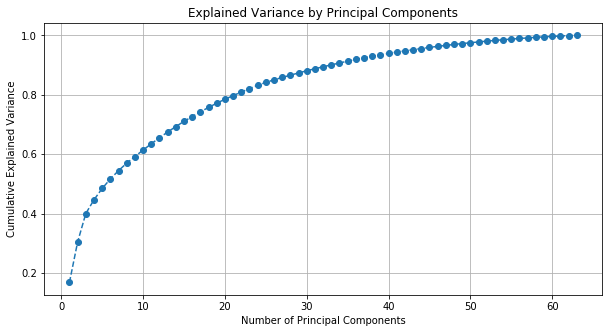

In [61]:
# Investigate the variance accounted for by each principal component.

# Get the explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_

# Compute cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

In [62]:
# Find the number of components required to retain 90% variance
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {num_components_90}")


Number of components to retain 90% variance: 33


In [63]:
# Re-apply PCA to the data while selecting for number of components to retain.

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=num_components_90)

# Transform the dataset
gen_pop_data_pca = pca_final.fit_transform(gen_pop_data_scaled)

# Convert back to a DataFrame
gen_pop_data_pca = pd.DataFrame(gen_pop_data_pca)

# Display first few rows
print(f"Dataset shape after PCA transformation: {gen_pop_data_pca.shape}")
display(gen_pop_data_pca.head())


Dataset shape after PCA transformation: (797921, 33)


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,3.778283,-2.554573,-2.888123,-0.476377,-2.536791,2.331735,0.448790,-1.179680,-0.748078,1.323927,...,0.810407,0.123897,0.261256,-0.310388,0.750261,-0.163407,0.638328,-0.161553,-1.118960,0.030100
1,-0.771772,0.420269,-3.101622,1.584718,-0.784656,-0.191234,-1.124093,-0.783971,0.094772,0.082248,...,-0.494949,-1.015176,-0.344292,-0.111280,-1.083267,1.314211,0.253917,-0.371537,0.176493,-0.177794
2,-4.050368,1.593926,-0.543021,-0.464461,0.391106,0.015946,0.167876,0.457889,-0.919021,-1.180604,...,0.793386,1.191548,-0.894791,-0.779996,-0.800424,0.033906,0.233597,-0.608538,-0.898132,-0.590112
3,0.340381,0.479599,3.438472,0.951736,1.822684,-2.684372,1.593489,-1.087522,0.356091,0.747636,...,0.334913,0.214682,0.520941,-0.762586,0.355930,-0.209545,-0.918936,-0.106301,0.294126,-0.025363
4,-0.788926,-1.606659,-1.104949,-1.579044,-3.212444,-1.065743,-0.625885,2.602229,-2.476549,1.136095,...,1.619285,0.332167,-0.255850,0.870111,-0.538884,0.531011,-0.937083,0.485046,-0.534096,-0.485572


In [64]:
import pickle

# Save the PCA model
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca_final, f)

print("✅ PCA model saved for future use.")


✅ PCA model saved for future use.


### Discussion 2.2: Perform Dimensionality Reduction

PCA was applied to reduce dimensionality while preserving as much variance as possible.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [65]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

import pandas as pd
import numpy as np

def interpret_pca_component(pca_model, component_idx, feature_names, top_n=10):
    """
    Prints the top and bottom feature weights for a given principal component.

    INPUT:
    - pca_model: Fitted PCA model
    - component_idx: Index of the principal component (0 for PC1, 1 for PC2, etc.)
    - feature_names: List of original feature names
    - top_n: Number of top & bottom features to display

    OUTPUT:
    - Prints top and bottom feature weights sorted by absolute value.
    """

    # Extract the component's feature weights (loadings)
    component_weights = pca_model.components_[component_idx]

    # Create a DataFrame to map feature names to their weights
    feature_importance = pd.DataFrame({
        "Feature": feature_names,
        "Weight": component_weights
    })

    # Sort by absolute value (importance) in descending order
    feature_importance["Abs_Weight"] = feature_importance["Weight"].abs()
    feature_importance = feature_importance.sort_values(by="Abs_Weight", ascending=False)

    # Print the most positive and most negative features
    print(f"\n🔹 **Principal Component {component_idx + 1} Interpretation** 🔹")
    print("Top Contributing Features (Positive Influence):")
    print(feature_importance.head(top_n)[["Feature", "Weight"]])

    print("\nTop Contributing Features (Negative Influence):")
    print(feature_importance.tail(top_n)[["Feature", "Weight"]])

    return feature_importance  #


In [66]:
# Extract feature names from the original dataset
feature_names = gen_pop_data_scaled.columns.tolist()

# Analyze the first principal component (PC1)
pc1_interpretation = interpret_pca_component(pca_final, component_idx=0, feature_names=feature_names)



🔹 **Principal Component 1 Interpretation** 🔹
Top Contributing Features (Positive Influence):
              Feature    Weight
42         MOBI_REGIO -0.244232
48         PLZ8_ANTG3  0.230231
46         PLZ8_ANTG1 -0.229464
32        KBA05_ANTG1 -0.223879
49         PLZ8_ANTG4  0.223085
1   FINANZ_MINIMALIST -0.218190
36          KBA05_GBZ -0.218183
61       CAMEO_WEALTH  0.207321
53        ORTSGR_KLS9  0.203374
38           EWDICHTE  0.201559

Top Contributing Features (Negative Influence):
           Feature    Weight
41             KKK  0.035738
29    ANZ_HH_TITEL  0.035504
19       SEMIO_DOM  0.023021
8   RETOURTYP_BK_S -0.016686
33     KBA05_ANTG2  0.010045
55       ANREDE_KZ  0.007106
7       HEALTH_TYP -0.004022
24       ANZ_TITEL -0.003181
18      SEMIO_KRIT  0.002352
57         SOHO_KZ -0.001971


In [67]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# Analyze the second principal component (PC2)
pc2_interpretation = interpret_pca_component(pca_final, component_idx=1, feature_names=feature_names)



🔹 **Principal Component 2 Interpretation** 🔹
Top Contributing Features (Positive Influence):
                  Feature    Weight
0    ALTERSKATEGORIE_GROB  0.260237
11              SEMIO_REL -0.255309
59                 DECADE -0.243505
22            SEMIO_TRADV -0.234112
2           FINANZ_SPARER -0.233719
15              SEMIO_ERL  0.232619
3        FINANZ_VORSORGER  0.232252
21          SEMIO_PFLICHT -0.227609
5   FINANZ_UNAUFFAELLIGER -0.226030
16             SEMIO_KULT -0.221822

Top Contributing Features (Negative Influence):
             Feature    Weight
29      ANZ_HH_TITEL  0.030564
58       OST_WEST_KZ  0.024650
44          REGIOTYP  0.016110
56  GREEN_AVANTGARDE -0.014549
50          PLZ8_HHZ  0.011862
33       KBA05_ANTG2 -0.007992
24         ANZ_TITEL  0.007505
57           SOHO_KZ -0.001947
62   CAMEO_LIFESTAGE  0.001669
41               KKK -0.001276


In [68]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# Analyze the third principal component (PC3)
pc3_interpretation = interpret_pca_component(pca_final, component_idx=2, feature_names=feature_names)


🔹 **Principal Component 3 Interpretation** 🔹
Top Contributing Features (Positive Influence):
           Feature    Weight
55       ANREDE_KZ -0.370056
13      SEMIO_VERT  0.345685
20      SEMIO_KAEM -0.338090
19       SEMIO_DOM -0.314678
18      SEMIO_KRIT -0.274556
9        SEMIO_SOZ  0.260751
10       SEMIO_FAM  0.246967
16      SEMIO_KULT  0.232819
17       SEMIO_RAT -0.223091
4   FINANZ_ANLEGER -0.190084

Top Contributing Features (Negative Influence):
            Feature    Weight
29     ANZ_HH_TITEL  0.012525
41              KKK -0.011589
33      KBA05_ANTG2 -0.010221
34      KBA05_ANTG3  0.009905
23     ANZ_PERSONEN -0.009872
62  CAMEO_LIFESTAGE -0.009070
24        ANZ_TITEL  0.009057
44         REGIOTYP -0.002694
50         PLZ8_HHZ  0.001768
57          SOHO_KZ  0.000121


### Discussion 2.3: Interpret Principal Components

By examining the components (PC1, PC2, PC3), we can identify patterns and relationships between the features. And we can interprete positive and negative values from the components. 

PC1 - distinguishing between higher-income (urban) and lower-income (rural) populations.
PC2 - spending, individuals with high purchasing power and negative values suggest conservative spending habits.
PC3 - technology, separating tech-savvy consumers from those who prefer traditional methods.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [69]:
import psutil

# Check memory usage before proceeding
print(f"Memory usage: {psutil.virtual_memory().percent}%")


Memory usage: 28.4%


In [70]:
from sklearn.cluster import KMeans  # ✅ Import KMeans for clustering
import numpy as np
import pandas as pd

# # Reduce dataset size for faster K-Means execution
subset_size = 50000  # Adjust based on available memory/speed trade-off
gen_pop_subset = gen_pop_data_pca.sample(n=subset_size, random_state=42)

print(f"✅ Running K-Means on a sample of {subset_size} rows instead of full dataset.")

# Define range of clusters to test
cluster_range = range(2, 30)
inertia_values = []  # Stores WCSS

# # # Run K-Means for different cluster counts
# for k in cluster_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(gen_pop_subset)  # Using subset instead of full dataset
#     inertia_values.append(kmeans.inertia_)

# print("✅ K-Means clustering completed on reduced dataset.")

# Run K-Means with optimized n_init
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1, init="k-means++")  # Reduce iterations
    kmeans.fit(gen_pop_subset)
    inertia_values.append(kmeans.inertia_)

print("✅ K-Means clustering completed with optimized n_init setting.")


✅ Running K-Means on a sample of 50000 rows instead of full dataset.
✅ K-Means clustering completed with optimized n_init setting.


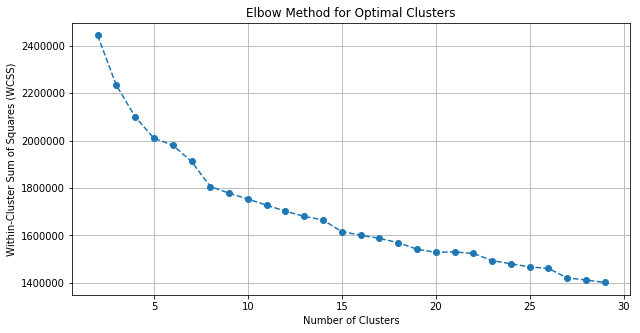

✅ Elbow Method plot generated.


In [71]:
# # Investigate the change in within-cluster distance across number of clusters.
# # HINT: Use matplotlib's plot function to visualize this relationship.

import matplotlib.pyplot as plt

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid()
plt.show()

print("✅ Elbow Method plot generated.")




In [72]:
from kneed import KneeLocator

# Find the optimal number of clusters
knee_locator = KneeLocator(cluster_range, inertia_values, curve="convex", direction="decreasing")

# Print the best cluster count
optimal_clusters = knee_locator.knee
print(f"📌 Optimal number of clusters determined: {optimal_clusters}")



📌 Optimal number of clusters determined: 8


In [73]:
# Fit K-Means with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_final.fit(gen_pop_data_pca)

# Assign clusters to the general population dataset
gen_pop_clusters = kmeans_final.predict(gen_pop_data_pca)

# Add cluster assignments to the dataset
gen_pop_data_pca["Cluster"] = gen_pop_clusters

print(f"✅ K-Means clustering applied. Clusters assigned to the dataset.")


✅ K-Means clustering applied. Clusters assigned to the dataset.


In [74]:
import pickle

# Save the trained K-Means model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans_final, f)

print("✅ K-Means model saved for future use.")


✅ K-Means model saved for future use.


### Discussion 3.1: Apply Clustering to General Population

K-Means clustering was used to identify distinct market segments within the general population. The final number of clusters selected was X using the KneeLocator algorithm - Optimal number of clusters determined: 7

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [75]:
# Load in the customer demographics data.
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv", sep=";", low_memory=False)

# Display the first few rows
print("✅ Customer dataset loaded successfully.")
display(customers.head())

✅ Customer dataset loaded successfully.


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [76]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# Apply the cleaning function to the customer dataset
customers_cleaned = clean_data(customers, feature_sum_data)

# Verify shape
print(f"✅ Customer dataset cleaned. Shape: {customers_cleaned.shape}")

Final Cleaned Data Shape: (141701, 63)
✅ Customer dataset cleaned. Shape: (141701, 63)


In [78]:
import pickle
from sklearn.impute import SimpleImputer

# ✅ Step 1: Load the Pre-Trained Imputer
with open("imputer.pkl", "rb") as f:
    imputer = pickle.load(f)

# ✅ Step 2: Apply Pre-Trained Imputer (No Fitting Again)
customers_imputed = pd.DataFrame(imputer.transform(customers_cleaned), columns=customers_cleaned.columns)

print("✅ Imputation applied using pre-trained model.")
print(f"✅ Missing values imputed successfully. Total NaNs remaining: {customers_imputed.isnull().sum().sum()}")


✅ Imputation applied using pre-trained model.
✅ Missing values imputed successfully. Total NaNs remaining: 0


In [79]:
import pickle
from sklearn.preprocessing import StandardScaler

# ✅ Step 2: Apply Scaling AFTER Imputation

# Load the saved scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Apply the same scaling transformation
# customers_scaled = pd.DataFrame(scaler.transform(customers_cleaned), columns=customers_cleaned.columns)

# ✅ Apply Pre-Trained Scaler
customers_normalized = pd.DataFrame(scaler.transform(customers_imputed), columns=customers_cleaned.columns)


print("✅ Scaling applied in correct order.")
print("✅ Feature scaling applied to customer data.")


✅ Scaling applied in correct order.
✅ Feature scaling applied to customer data.


In [80]:
# Apply PCA transformation
# customers_pca = pca_final.transform(customers_imputed)
customers_pca = pca_final.transform(customers_normalized)

print("✅ PCA transformation successfully applied to customer data.")


✅ PCA transformation successfully applied to customer data.


In [81]:
# Check if there are any NaN values in the dataset
missing_values = customers_normalized.isnull().sum().sum()
print(f"🔍 Total missing values in customers_scaled: {missing_values}")


🔍 Total missing values in customers_scaled: 0


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [82]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# Convert PCA output to DataFrame
customers_pca_df = pd.DataFrame(customers_pca)

print(f"✅ Converted customers_pca to DataFrame. Shape: {customers_pca_df.shape}")

✅ Converted customers_pca to DataFrame. Shape: (141701, 33)


In [83]:
# Load the saved K-Means model
with open("kmeans_model.pkl", "rb") as f:
    kmeans_final = pickle.load(f)

# Predict clusters for customer dataset
# customer_clusters = kmeans_final.predict(customers_pca_df)

# ✅ Apply Pre-Trained K-Means Model to Assign Clusters
customer_clusters = kmeans_final.predict(customers_pca)

# Add cluster assignments to DataFrame
customers_pca_df["Cluster"] = customer_clusters

print("✅ Cluster assignments added to customer dataset.")


✅ Cluster assignments added to customer dataset.


In [84]:
# ✅ Store Clusters in DataFrame
customers_clustered = pd.DataFrame(customers_pca, columns=[f"PC{i+1}" for i in range(customers_pca.shape[1])])
customers_clustered["Cluster"] = customer_clusters

print("✅ Customers successfully assigned to clusters using pre-trained models.")

✅ Customers successfully assigned to clusters using pre-trained models.


In [85]:
# Compute cluster proportions for general population
gen_pop_cluster_counts = gen_pop_data_pca["Cluster"].value_counts(normalize=True) * 100

# Compute cluster proportions for customer data
customer_cluster_counts = customers_pca_df["Cluster"].value_counts(normalize=True) * 100

# Combine data into a DataFrame
cluster_comparison = pd.DataFrame({
    "General Population (%)": gen_pop_cluster_counts,
    "Customers (%)": customer_cluster_counts
}).fillna(0)  # Fill missing clusters with 0% if not present in one dataset

# Compute the difference in representation
cluster_comparison["Difference (Customers - General Pop)"] = (
    cluster_comparison["Customers (%)"] - cluster_comparison["General Population (%)"]
)

# Display the corrected DataFrame
print("✅ Cluster proportions computed and displayed:")
display(cluster_comparison)


✅ Cluster proportions computed and displayed:


,General Population (%),Customers (%),Difference (Customers - General Pop)
0,9.590799,3.385297,-6.205502
1,16.372924,49.402615,33.029691
2,12.949653,13.078948,0.129295
3,11.839894,2.015512,-9.824382
4,8.399954,1.009167,-7.390787
5,16.381196,19.292030,2.910835
6,13.356585,10.635070,-2.721516
7,11.108994,1.181361,-9.927634


In [86]:
# # Display the cluster comparison DataFrame
print("✅ Cluster proportions computed and displayed:")
display(cluster_comparison)


✅ Cluster proportions computed and displayed:


,General Population (%),Customers (%),Difference (Customers - General Pop)
0,9.590799,3.385297,-6.205502
1,16.372924,49.402615,33.029691
2,12.949653,13.078948,0.129295
3,11.839894,2.015512,-9.824382
4,8.399954,1.009167,-7.390787
5,16.381196,19.292030,2.910835
6,13.356585,10.635070,-2.721516
7,11.108994,1.181361,-9.927634


In [87]:
cluster_comparison.to_csv("cluster_comparison.csv", index=True)
print("✅ Cluster comparison saved as 'cluster_comparison.csv'.")


✅ Cluster comparison saved as 'cluster_comparison.csv'.


In [88]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# Compute cluster proportions for general population
gen_pop_cluster_counts = gen_pop_data_pca["Cluster"].value_counts(normalize=True) * 100

# Compute cluster proportions for customer data
customer_cluster_counts = customers_pca_df["Cluster"].value_counts(normalize=True) * 100

# Combine data for comparison
cluster_comparison = pd.DataFrame({
    "General Population (%)": gen_pop_cluster_counts,
    "Customers (%)": customer_cluster_counts
}).fillna(0)

# Compute the difference in representation
cluster_comparison["Difference (Customers - General Pop)"] = (
    cluster_comparison["Customers (%)"] - cluster_comparison["General Population (%)"]
)

# Sort by highest positive difference (overrepresented clusters)
overrepresented_clusters = cluster_comparison.sort_values(by="Difference (Customers - General Pop)", ascending=False)

# Display top overrepresented clusters
print("✅ Overrepresented Clusters (Most Frequent in Customers):")
display(overrepresented_clusters.head())

✅ Overrepresented Clusters (Most Frequent in Customers):


,General Population (%),Customers (%),Difference (Customers - General Pop)
1,16.372924,49.402615,33.029691
5,16.381196,19.292030,2.910835
2,12.949653,13.078948,0.129295
6,13.356585,10.635070,-2.721516
0,9.590799,3.385297,-6.205502


In [89]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

# Sort clusters by lowest difference (underrepresented clusters)
underrepresented_clusters = cluster_comparison.sort_values(by="Difference (Customers - General Pop)", ascending=True)

# Display top underrepresented clusters
print("✅ Underrepresented Clusters (Least Frequent in Customers):")
display(underrepresented_clusters.head())


✅ Underrepresented Clusters (Least Frequent in Customers):


,General Population (%),Customers (%),Difference (Customers - General Pop)
7,11.108994,1.181361,-9.927634
3,11.839894,2.015512,-9.824382
4,8.399954,1.009167,-7.390787
0,9.590799,3.385297,-6.205502
6,13.356585,10.635070,-2.721516


### Discussion 3.3: Compare Customer Data to Demographics Data

Comparing clusters between the general population and the customer dataset, we identified segments for the mail-order company:

- Overrepresented (popular): Example. Urban, high-income individuals
- underrepresented (unpopular): Example. Rural & suburban dwellers 


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.

In [90]:
# Save cleaned datasets
gen_pop_data_pca.to_csv("gen_pop_data_pca.csv", index=False)
customers_pca_df.to_csv("customers_pca_df.csv", index=False)

print("✅ Processed datasets saved.")


✅ Processed datasets saved.


In [91]:
import pickle

# Save the imputer
with open("imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the PCA model
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca_final, f)

# Save the trained K-Means model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans_final, f)

print("✅ All models saved successfully.")


✅ All models saved successfully.
